## Assignment 3 

Using Jupyter Notebook to complete Assignment 3 which requires: In the first part, you will use a library to download stock market data and
plot candle stick graphs. In the second part, you will read a data file, perform computations, and plot the
results.

In [1]:
#importing the packages required for the assignment 
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
#answering Part A of the assignment 
#downloading the data for the stock IVV for the month of January 2024
ivv = yf.download("IVV", start="2025-01-01", end="2025-01-31")

#flatten MultiIndex columns to fix the error that im getting without it: Data for column "Open" must be ALL float or int.
if isinstance(ivv.columns, pd.MultiIndex):
    ivv.columns = ivv.columns.get_level_values(0)

#checking whether the data downloaded is correct or not
print(ivv)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Date                                                               
2025-01-02  587.450012  593.909973  583.330017  592.169983  9400400
2025-01-03  594.609985  595.429993  589.270020  590.340027  5867300
2025-01-06  598.299988  602.559998  596.429993  599.150024  4188000
2025-01-07  591.570007  600.570007  589.599976  600.289978  3810700
2025-01-08  592.190002  593.369995  587.979980  591.489990  5303600
2025-01-10  583.330017  588.690002  581.330017  588.690002  5881200
2025-01-13  584.179993  584.510010  578.000000  578.510010  3658800
2025-01-14  584.989990  587.739990  581.169983  587.140015  4063200
2025-01-15  595.630005  596.780029  584.989990  593.179993  5156300
2025-01-16  594.619995  597.200012  593.820007  597.030029  4562400
2025-01-17  600.260010  602.229980  598.510010  599.760010  4002700
2025-01-21  605.700012  605.960022  601.599976  603.609985  7109800
2025-01-22  609.299988  610.739990  608.359985  

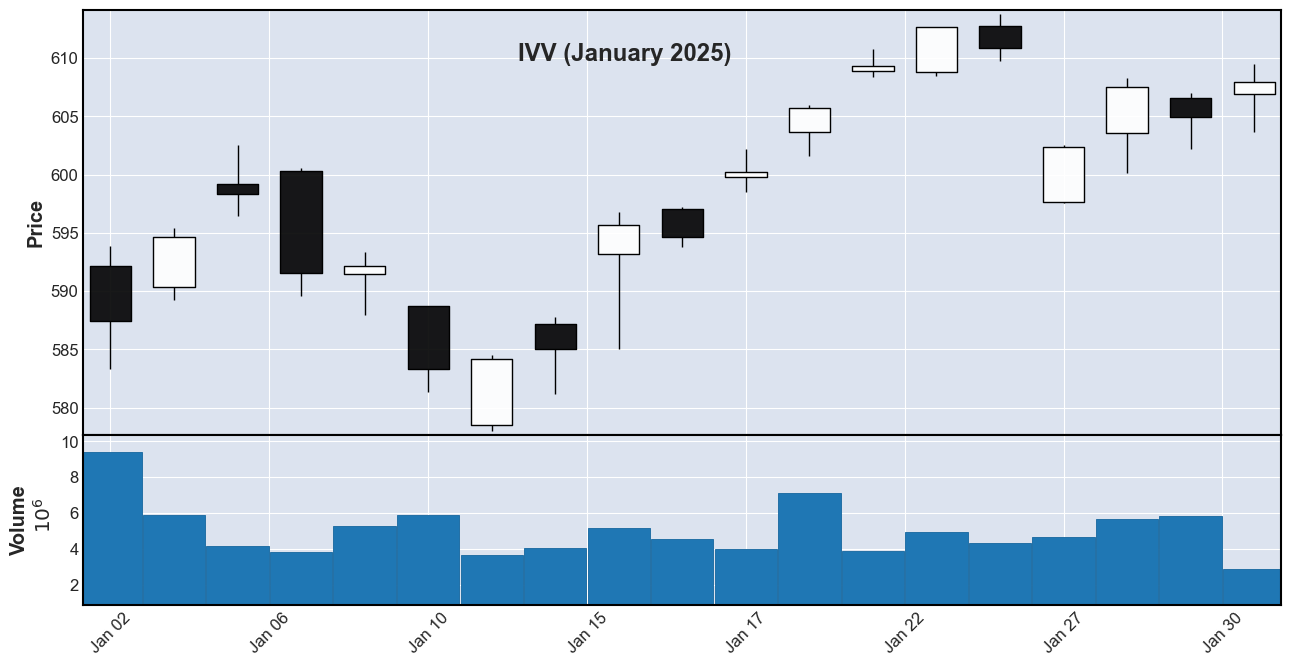

In [3]:
#make sure the colours of the candlestick graph match the one in the example in the assignment 
mc = mpf.make_marketcolors(up='white', down='black', edge='black', wick='black', volume='blue')

#plotting the data into a candlestick chart with volume
mpf.plot(ivv,
    type='candle',
    title="IVV (January 2025)",
    ylabel="Price",
    ylabel_lower="Volume",
    volume=True,
    tight_layout=True,
    figratio=(10, 5),  
    figscale=1.2,
     )


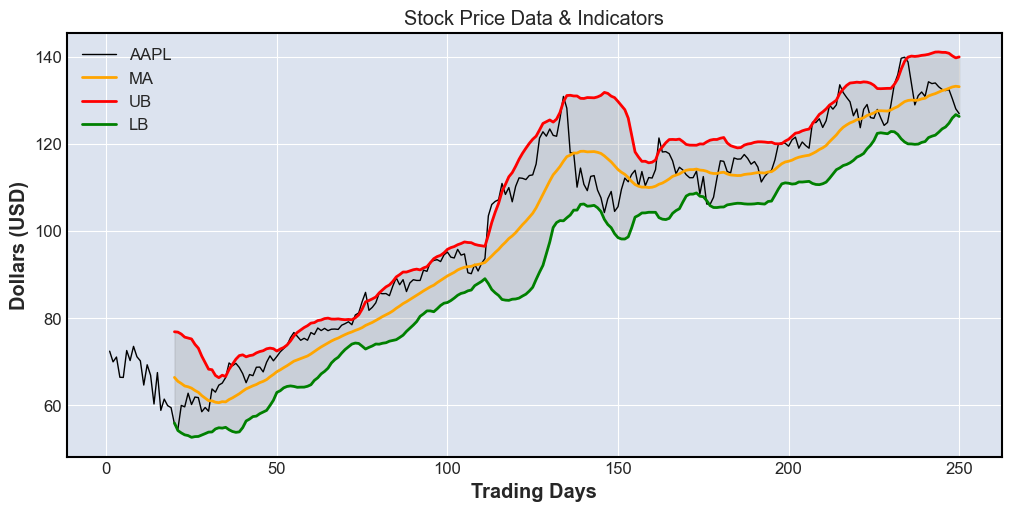

In [4]:
#answering Part B of the assignment 
#writing the path for the data file
file_path = "/Users/rafeuherahum/Documents/FINE3300/FINE3300-Assignment3/StockData.csv"
df = pd.read_csv(file_path)

#make sure that only Trading Day and AAPL stock price is selected for use in the calculations and plotting 
df_aapl = df[['Trading Day', 'AAPL']].copy()

#only the first 250 trading days should be used as instructed in the assignment
df_aapl = df_aapl.head(250)

#calculating the 20-day Moving Average using the rolling function in Pandas and mean function
df_aapl['MA'] = df_aapl['AAPL'].rolling(window=20).mean()

#calculating the st.dev over a 20-day rolling window using Pandas' std function
#make sure the standard deviation is calculated as a population standard deviation
df_aapl['SD'] = df_aapl['AAPL'].rolling(window=20).std(ddof=0) 

#calculating the Upper and Lower Bollinger Bands
df_aapl['Upper_Band'] = df_aapl['MA'] + (2 * df_aapl['SD'])  # Upper Band = MA + 2 * SD
df_aapl['Lower_Band'] = df_aapl['MA'] - (2 * df_aapl['SD'])  # Lower Band = MA - 2 * SD

#creating the plot for the stock price data and indicators
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')  

#plotting AAPL stock price black like the example in the assignment
ax.plot(df_aapl['Trading Day'], df_aapl['AAPL'], label="AAPL", color='black', linewidth=1)

#plotting the 20-day Moving Average in orange like the example in the assignment
ax.plot(df_aapl['Trading Day'], df_aapl['MA'], label="MA", color='orange')

#plotting the Upper and Lower Bollinger Bands in red and green respectively like the example in the assignment
ax.plot(df_aapl['Trading Day'], df_aapl['Upper_Band'], label="UB", color='red')
ax.plot(df_aapl['Trading Day'], df_aapl['Lower_Band'], label="LB", color='green')

#shading the area between the Upper and Lower Bollinger Bands grey like the example in the assignment
ax.fill_between(df_aapl['Trading Day'], df_aapl['Upper_Band'], df_aapl['Lower_Band'], color='gray', alpha=0.2)

#formatting the graph to have labels and legend like the example in the assignment
ax.set_xlabel("Trading Days")  
ax.set_ylabel("Dollars (USD)")  
ax.set_title("Stock Price Data & Indicators")  
ax.legend() 

plt.show()